# k mean clustering implementation -Unsupervised algorithm

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [4]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
#iloc method to extract the columns
x=data.iloc[:,3:].values
x


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

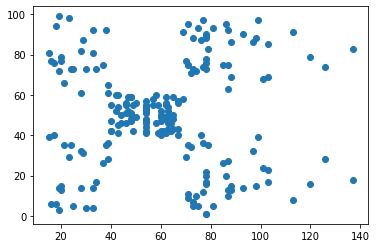

In [9]:
#plot the data among these two features
plt.scatter(x[:,0],x[:,1])

In [40]:
# To find the number of clusters WCSS(inertia) where we plot elbow
wcss=[]
for i in range(1,11): #trial and error
    k=KMeans(n_clusters=i,init='k-means++',random_state=0)
    k.fit(x)
    wcss.append(k.inertia_)
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30273.394312070028,
 25018.576334776328,
 21850.16528258562,
 19664.68519600554]

Text(0, 0.5, 'WCSS')

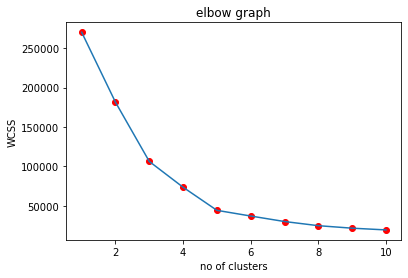

In [41]:
#plot the graph by taking iteration values and WCSS
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,c='r')
plt.title('elbow graph')
plt.xlabel('no of clusters')
plt.ylabel('WCSS')

In [42]:
# Let us find which dataset belongs to clusters
k=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=k.fit_predict(x)    #will helps us which data points belong to c
y

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [43]:
#position of the centroids at centres
k.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

Text(0, 0.5, 'spending score')

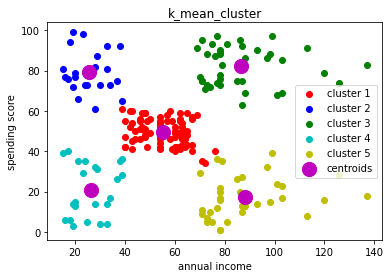

In [44]:
#plot the final graph
plt.scatter(x[y==0,0],x[y==0,1],c='r',label='cluster 1')                                                                                                                                                                                                                                                                                                                   
plt.scatter(x[y==1,0],x[y==1,1],c='b',label='cluster 2')                                                                                                                                                                                                                                                                                                                                                                                                                             
plt.scatter(x[y==2,0],x[y==2,1],c='g',label='cluster 3') 
plt.scatter(x[y==3,0],x[y==3,1],c='c',label='cluster 4')  
plt.scatter(x[y==4,0],x[y==4,1],c='y',label='cluster 5')
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],s=200,c='m',label='centroids')
plt.legend()
plt.title("k_mean_cluster")
plt.xlabel("annual income")
plt.ylabel('spending score')

# Interpretation of the graph

Cluster 4:less salary ans less spending score

Cluster 2: less salary and high spending score

Cluster 1: Average salary and average spending score

Cluster 3: High salary and High spending score(offers can be provided)

Cluster 5: High salart and less spending score (discounts can provide)

# End of program 3